# **LSTM Work**

In [46]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# DataFrame of Monthly Gold Prices 1992-2020.
file_path=Path("~/git/HolidaySales/DataSets/1992_To_2020_Monthly_Gold_clean.csv")
full_gold_df=pd.read_csv(file_path,infer_datetime_format=True,parse_dates=True,index_col="DATE")

In [3]:
full_gold_df.head()

,close
DATE,
1992-01-01,350.90
1992-02-01,356.40
1992-03-01,350.45
1992-04-01,344.00
1992-05-01,337.50


In [4]:
# DataFrame of ALL features not including NLP sentiment from 1992 to 2020 Monthly.
file_path2=Path("~/git/HolidaySales/DataSets/features.csv")
features_df=pd.read_csv(file_path2,infer_datetime_format=True,parse_dates=True,index_col="DATE")

In [5]:
features_df.head()

,y_monthly_retail,gas_prices,consumer_sentiments,unemployment_rate,CPI,dow_index,Consumer_debt_service,Pct_chng_prv_yr,GDPC1
DATE,,,,,,,,,
1992-01-01,146925.0,1.02200,67.5,7.3,138.3,88.41,4.867179,2.9,9534.346
1992-02-01,147223.0,1.00600,68.8,7.4,138.6,89.32,4.867179,2.9,9534.346
1992-03-01,146805.0,1.01260,76.0,7.4,139.1,90.88,4.867179,2.9,9534.346
1992-04-01,148032.0,1.05175,77.2,7.4,139.4,90.33,4.774439,3.2,9637.732
1992-05-01,149010.0,1.10725,79.2,7.6,139.7,87.50,4.774439,3.2,9637.732


In [6]:
# DataFrame of ALL features not including NLP sentiment from 1992 to 2020 Nov.-Dec. only.
file_path3=Path("~/git/HolidaySales/nov_dec_featuress.csv")
features_cut_df=pd.read_csv(file_path3,infer_datetime_format=True,parse_dates=True,index_col="DATE")

In [7]:
features_cut_df.head()

,y_monthly_retail,gas_prices,consumer_sentiments,unemployment_rate,CPI,dow_index,Consumer_debt_service,Pct_chng_prv_yr,GDPC1
DATE,,,,,,,,,
1992-11-01,153583.0,1.11120,85.3,7.4,142.1,91.12,4.660212,4.4,9834.510
1992-12-01,155614.0,1.07750,91.0,7.4,142.3,93.87,4.660212,4.4,9834.510
1993-11-01,166594.0,1.06640,81.2,6.6,146.0,96.43,4.755414,2.6,10091.049
1993-12-01,168161.0,1.01400,88.2,6.5,146.3,97.46,4.755414,2.6,10091.049
1994-11-01,180703.0,1.11575,91.6,5.6,149.8,89.19,5.120072,4.1,10506.372


In [8]:
# DataFrame of Nov-Dec NLTK Sentiment Scores.
file_path4=Path("~/git/HolidaySales/NYT_updated.csv")
nltk_df=pd.read_csv(file_path4,infer_datetime_format=True,parse_dates=True,index_col="pub_date")

In [9]:
# Organize and clean nltk data.
nltk_df=nltk_df.drop(columns=["Unnamed: 0"])
nltk_df.head()

,abstract,compound,neg,neu,pos
pub_date,,,,,
1992-12-26 05:00:00,It was a hair-raising holiday season for man...,0.7850,0.058,0.765,0.177
1992-12-13 05:00:00,A Blow to the Wallet Retailers and public ...,-0.1280,0.109,0.806,0.085
1992-11-28 05:00:00,Signs of a comeback in consumer spending pus...,0.6124,0.000,0.894,0.106
1992-12-12 05:00:00,Losses at R. H. Macy & Company narrowed in t...,-0.8316,0.115,0.867,0.018
1992-11-19 05:00:00,With their fingers tightly crossed and rabbi...,0.9797,0.110,0.542,0.348


In [10]:
nltk_df=nltk_df.sort_index()

In [11]:
nltk_df.head()

,abstract,compound,neg,neu,pos
pub_date,,,,,
1992-11-17 05:00:00,"The Kmart Corporation, the discount and spec...",0.8442,0.000,0.892,0.108
1992-11-19 05:00:00,With their fingers tightly crossed and rabbi...,0.9797,0.110,0.542,0.348
1992-11-28 05:00:00,Signs of a comeback in consumer spending pus...,0.6124,0.000,0.894,0.106
1992-12-10 05:00:00,The economy is improving modestly but uneven...,0.7227,0.054,0.812,0.134
1992-12-12 05:00:00,Losses at R. H. Macy & Company narrowed in t...,-0.8316,0.115,0.867,0.018


In [12]:
nltk_df=nltk_df.drop(columns=["abstract"])

In [13]:
nltk_df=nltk_df.drop(columns=["neg","neu","pos"])

In [14]:
nltk_df.index.year

Int64Index([1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992, 1992,
            ...
            2018, 2018, 2018, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='pub_date', length=262)

In [15]:
# Average the compound sentiment score for each month.
nltk_df_grp=nltk_df.groupby([nltk_df.index.year,nltk_df.index.month]).mean()

In [16]:
nltk_df_grp

compound
pub_date pub_date          
1992     11        0.812100
         12        0.458857
1993     11        0.762175
         12        0.500550
1994     11        0.667100
         12        0.366667
1995     11        0.485533
         12       -0.133071
1996     11        0.722600
         12        0.378529
1997     11        0.855950
         12        0.362400
1998     11        0.348533
         12        0.684171
1999     11        0.373900
         12        0.393729
2000     11        0.327100
         12        0.187512
2001     11       -0.161250
         12       -0.107625
2002     11        0.585900
         12        0.138056
2003     11        0.578900
         12        0.400457
2004     11        0.057950
         12        0.585150
2005     11        0.408386
         12        0.909933
2006     11        0.041875
         12        0.155633
2007     11        0.085457
         12        0.151167
2008     11        0.419380
         12        0.275620
2009     11        0.297650
         12        0.523625
2010     11        0.378350
         12        0.144425
2011     11        0.000000
         12        0.142437
2012     11        0.149275
         12        0.382017
2013     11        0.458200
         12       -0.298725
2014     11        0.115883
         12        0.245875
2015     11        0.388111
         12       -0.421500
2016     12        0.302650
2017     11        0.499420
         12        0.000000
2018     11        0.327625
         12        0.346600
2019     11        0.000000
         12        0.222725

In [17]:
nltk_df_grp.index

MultiIndex(levels=[[1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], [11, 12]],
           codes=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 25, 25, 26, 26, 27, 27], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1]],
           names=['pub_date', 'pub_date'])

In [18]:
nltk_df_grp.index=nltk_df_grp.index.to_flat_index()

In [19]:
nltk_df_grp.head()

,compound
"(1992, 11)",0.812100
"(1992, 12)",0.458857
"(1993, 11)",0.762175
"(1993, 12)",0.500550
"(1994, 11)",0.667100


In [20]:
#nltk_df_grp.to_csv("NEW_Nov_Dec_NLTK_Average_Sentiment_Score_Annual.csv")

In [21]:
file_path5=Path("~/git/HolidaySales/NEW_Nov_Dec_NLTK_Average_Sentiment_Score_2.csv")
df=pd.read_csv(file_path5,infer_datetime_format=True,parse_dates=True,index_col="DATE")

In [22]:
df.head()

,compound
DATE,
1992-11-01,0.812100
1992-12-01,0.458857
1993-11-01,0.762175
1993-12-01,0.500550
1994-11-01,0.667100


In [23]:
# Get the full updated dataframe Nov/Dec ONLY w/Gold.
file_path6=Path("~/git/HolidaySales/DataSets/Main_gold.csv")
main_df=pd.read_csv(file_path6,parse_dates=True,infer_datetime_format=True)

In [24]:
main_df.head()

,DATE,NYT_sentiment,gas_prices,consumer_sentiments,unemployment_rate,CPI,retail_index,Consumer_debt_service,GDP_growth,sales,GDP,close
0,11/1/1992,0.812100,1.11120,85.3,7.4,-3.664766,91.12,4.660212,4.4,-18182.99304,-576.109447,339.50
1,11/1/1993,0.762175,1.06640,81.2,6.6,-4.077295,96.43,4.755414,2.6,-15860.78098,-676.804025,363.25
2,11/1/1994,0.667100,1.11575,91.6,5.6,-4.587534,89.19,5.120072,4.1,-12429.20455,-618.354534,384.50
3,11/1/1995,0.485533,1.06225,88.2,5.6,-4.990644,85.37,5.594352,2.2,-14721.98639,-742.978904,381.95
4,11/1/1996,0.722600,1.23225,99.2,5.4,-4.278919,87.88,5.777011,4.4,-14186.08089,-621.669592,377.60


In [25]:
# Returns for Dow Index.
main_df["retail_index"]=main_df["retail_index"].pct_change()

In [26]:
# Returns for Gold.
main_df["close"]=main_df["close"].pct_change()

In [27]:
main_df.head()

,DATE,NYT_sentiment,gas_prices,consumer_sentiments,unemployment_rate,CPI,retail_index,Consumer_debt_service,GDP_growth,sales,GDP,close
0,11/1/1992,0.812100,1.11120,85.3,7.4,-3.664766,NaN,4.660212,4.4,-18182.99304,-576.109447,NaN
1,11/1/1993,0.762175,1.06640,81.2,6.6,-4.077295,0.058275,4.755414,2.6,-15860.78098,-676.804025,0.069956
2,11/1/1994,0.667100,1.11575,91.6,5.6,-4.587534,-0.075080,5.120072,4.1,-12429.20455,-618.354534,0.058500
3,11/1/1995,0.485533,1.06225,88.2,5.6,-4.990644,-0.042830,5.594352,2.2,-14721.98639,-742.978904,-0.006632
4,11/1/1996,0.722600,1.23225,99.2,5.4,-4.278919,0.029401,5.777011,4.4,-14186.08089,-621.669592,-0.011389


In [31]:
# FINAL DF WITH RETURNS FOR GOLD AND THE RETAIL INDEX NOV-DEC ONLY.
file_path7=Path("~/git/HolidaySales/MAIN_DF_WITH_GOLD.csv")
main_df=pd.read_csv(file_path7,infer_datetime_format=True,parse_dates=True,index_col="DATE")

In [33]:
main_df=main_df.drop(columns=["Unnamed: 0"])
main_df.head()

,NYT_sentiment,gas_prices,consumer_sentiments,unemployment_rate,CPI,Retail_Index_Returns,Consumer_debt_service,GDP_growth,sales,GDP,Gold_Returns
DATE,,,,,,,,,,,
1992-11-01,0.812100,1.11120,85.3,7.4,-3.664766,0.000000,4.660212,4.4,-18182.99304,-576.109447,0.000000
1993-11-01,0.762175,1.06640,81.2,6.6,-4.077295,0.058275,4.755414,2.6,-15860.78098,-676.804025,0.069956
1994-11-01,0.667100,1.11575,91.6,5.6,-4.587534,-0.075080,5.120072,4.1,-12429.20455,-618.354534,0.058500
1995-11-01,0.485533,1.06225,88.2,5.6,-4.990644,-0.042830,5.594352,2.2,-14721.98639,-742.978904,-0.006632
1996-11-01,0.722600,1.23225,99.2,5.4,-4.278919,0.029401,5.777011,4.4,-14186.08089,-621.669592,-0.011389


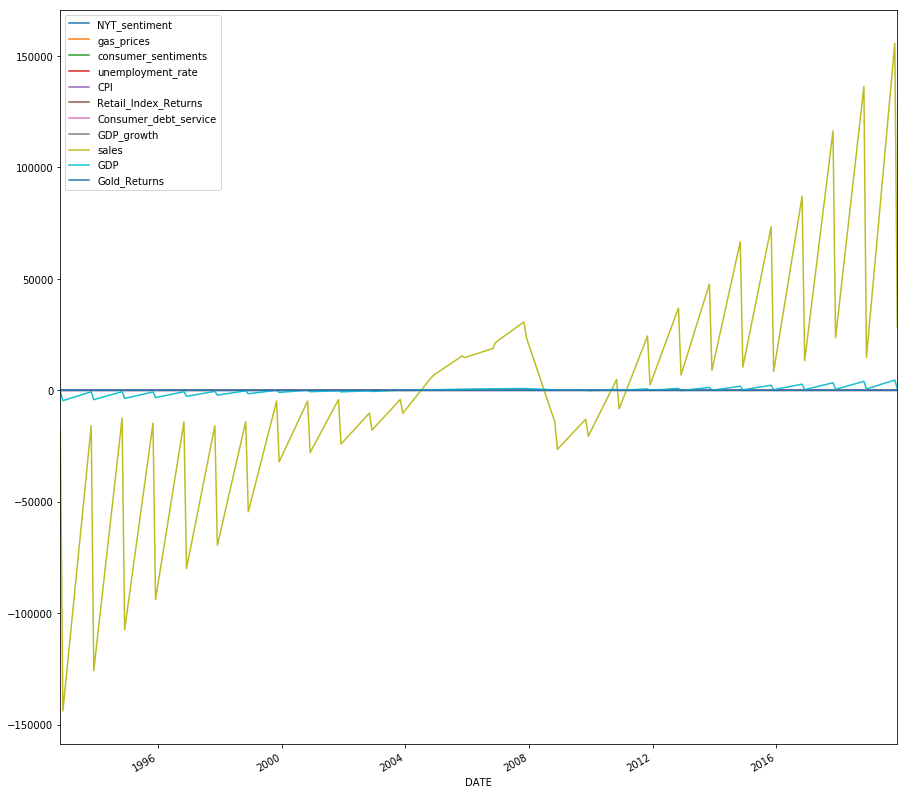

In [37]:
main_df.plot(figsize=(15,15))

In [47]:
r_r=main_df["Retail_Index_Returns"]
g_r=main_df["Gold_Returns"]

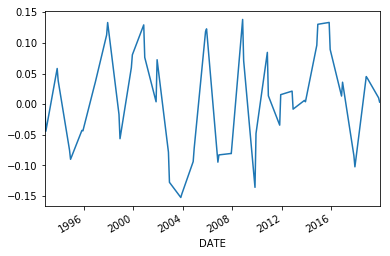

In [50]:
r_r.plot()

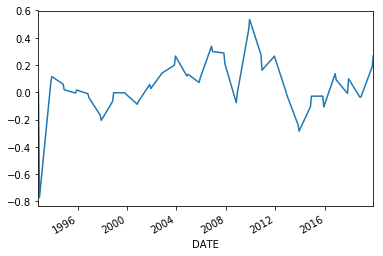

In [51]:
g_r.plot()

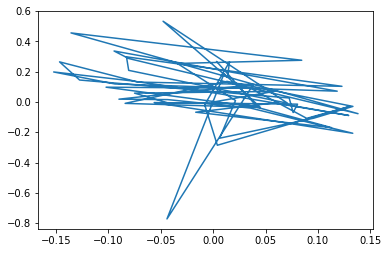

In [49]:
plt.plot(r_r,g_r) # plotting t, a separately  
plt.show()

ValueError: Can not reset the axes.  You are probably trying to re-use an artist in more than one Axes which is not supported

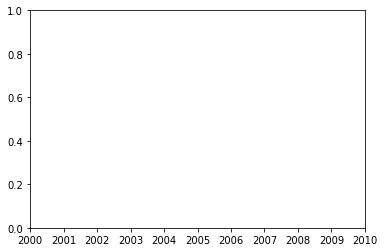

In [45]:
main_df["Retail_Index_Returns"].plot(axes=ax)

In [123]:
# Combine everything with Gold.
super_main=super_main.join(full_gold_df,sort=False)

ValueError: columns overlap but no suffix specified: Index(['DATE', 'close'], dtype='object')

In [ ]:
# Use 70% of the data for training and the remainder for testing
split = int(0.6 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.

scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
model = Sequential()

number_units = 30
#dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
#model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
#model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
#model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))